In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

In [2]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
X_train, y_train, X_test, y_test = fashion_mnist[0][0], fashion_mnist[0][1], fashion_mnist[1][0], fashion_mnist[1][1]

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
def plots(ims,figsize=(50,10),rows=1,interp=False, titles=None):
    if type(ims[0])is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims)%2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=40)
        plt.imshow(ims[i], interpolation= None if interp else 'none')

Train on 60000 samples, validate on 10000 samples
60000/60000 [==============================] - 33s 547us/sample - loss: 0.5417 - accuracy: 0.8020 - val_loss: 0.3764 - val_accuracy: 0.8631


/home/shubham/onward/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


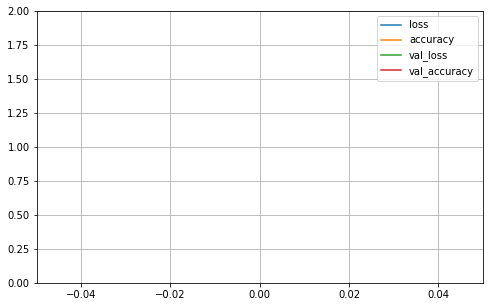

In [8]:


model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

#tensorboard
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_cb])

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

model.save("fashion_mnist.h5")